In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('Algerian_forest_fires_dataset_CLEAN.csv')

In [4]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [5]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [6]:
# droping columns that are not useful
df.drop(['day', 'month', 'year'], axis=1 , inplace = True)

In [7]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [8]:
# Encoding
df['Classes'] = np.where(df['Classes'].str.contains('not fire'),0, 1)

In [9]:
df.Classes.value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [10]:
# Independent and dependent feature
X =df.drop('FWI', axis =1)
y = df['FWI']

In [11]:
# Train Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.25, random_state = 42)

In [12]:
print(f'X Train: {X_train.shape}')
print(f'X Test: {X_test.shape}')

X Train: (182, 11)
X Test: (61, 11)


<Axes: >

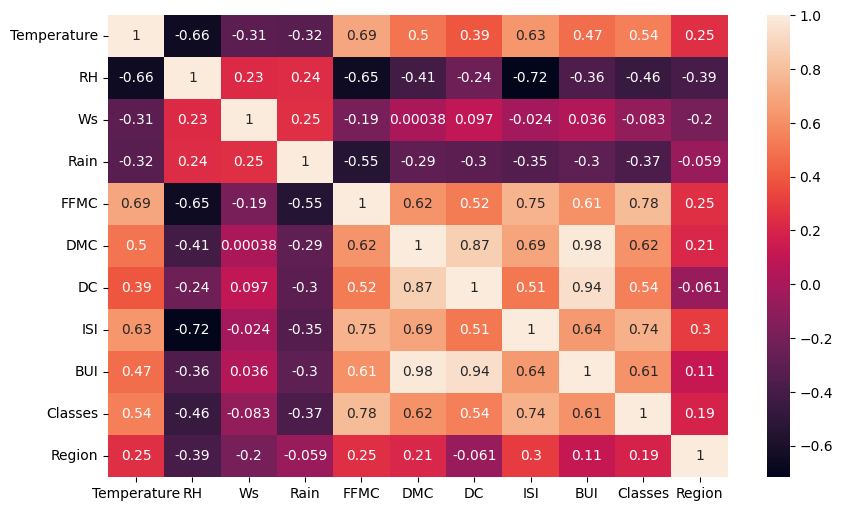

In [13]:
# feature selection based on correlation
plt.figure(figsize = (10,6))
sns.heatmap(data = X_train.corr(), annot = True)

In [14]:
# check for multicolinearlity
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()

    for i in range(len(corr_matrix)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    
    return col_corr


In [15]:
# threshold -- Domain experties
corr_features = correlation(X_train, 0.85)
corr_features

{'BUI', 'DC'}

In [16]:
# drop features that have threshold value more than 0.85
X_train.drop(corr_features, axis=1, inplace = True)
X_test.drop(corr_features, axis=1, inplace = True)
print(X_train.shape)
print(X_test.shape)

(182, 9)
(61, 9)


In [17]:
## feature Scaling or Standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled  = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Boxplot to understand the effect of StandardScaler

Text(0.5, 1.0, 'X_train after scaling')

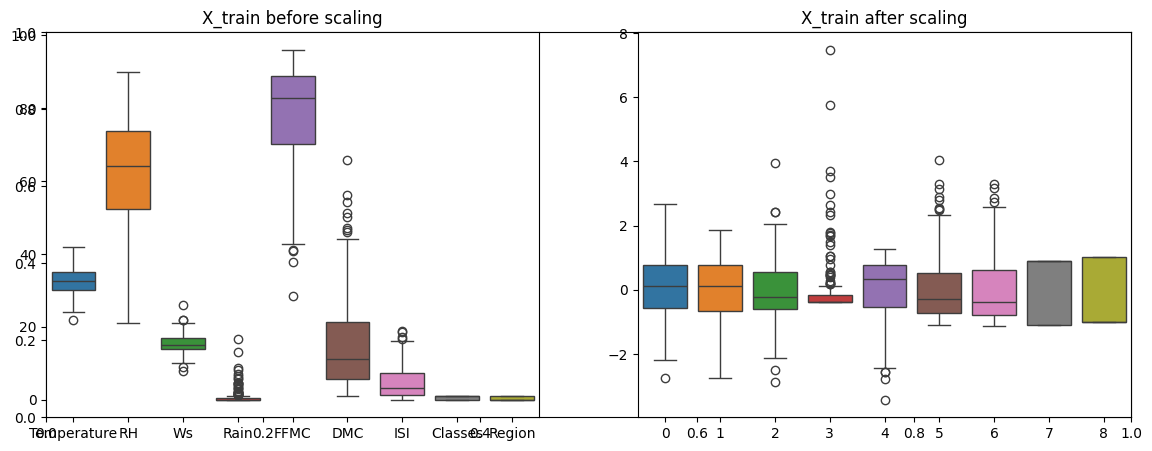

In [18]:
plt.subplots(figsize= (14, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data= X_train)
plt.title('X_train before scaling')

plt.subplot(1,2,2)
sns.boxplot(data = X_train_scaled)
plt.title('X_train after scaling')


### Linear Regression

MSE:  0.674276687379158
MAE:  0.5468236465249978
r2_score:  0.9847657384266951


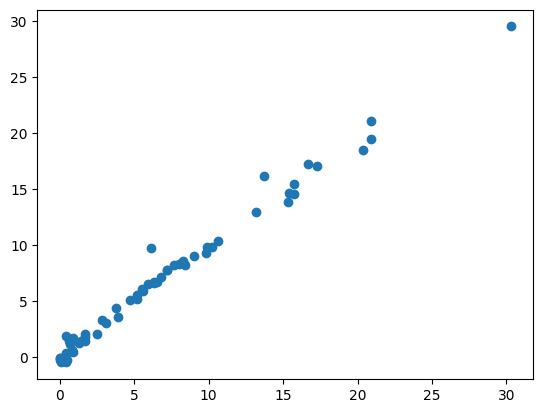

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error ,mean_absolute_error, r2_score

lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
y_pred = lin_reg.predict(X_test_scaled)

# mean square error
mse = mean_squared_error(y_test, y_pred)
# mean absolute error
mae = mean_absolute_error(y_test, y_pred)
# R2 score
score = r2_score(y_test, y_pred)

print('MSE: ', mse)
print('MAE: ', mae)
print('r2_score: ', score)

plt.scatter(y_test, y_pred)

### Lasso Regression (L1 regularization)

MSE:  2.2483458918974772
MAE:  1.133175994914409
r2_score:  0.9492020263112388


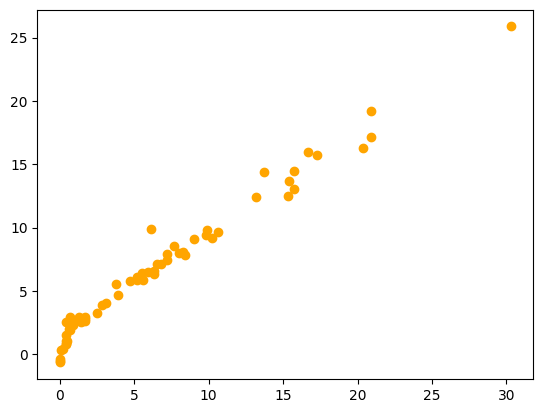

In [20]:

from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train_scaled, y_train)
y_pred = lasso.predict(X_test_scaled)

# mean square error
mse = mean_squared_error(y_test, y_pred)
# mean absolute error
mae = mean_absolute_error(y_test, y_pred)
# R2 score
score = r2_score(y_test, y_pred)

print('MSE: ', mse)
print('MAE: ', mae)
print('r2_score: ', score)


plt.scatter(y_test, y_pred, color = 'orange')

#### Cross validation on Lasso regression

In [21]:
from sklearn.linear_model import LassoCV

lassocv = LassoCV(cv= 5)
lassocv.fit(X_train_scaled, y_train)

,eps,0.001
,n_alphas,'deprecated'
,alphas,'warn'
,fit_intercept,True
,precompute,'auto'
,max_iter,1000
,tol,0.0001
,copy_X,True
,cv,5
,verbose,False
,n_jobs,None


In [22]:
lassocv.alpha_

np.float64(0.05725391318234408)

In [23]:
lassocv.mse_path_

array([[53.64536329, 65.39074075, 54.89628985, 77.90299066, 39.38236846],
       [46.99139716, 59.81506814, 49.29840831, 75.6645852 , 35.31758355],
       [41.14908917, 53.9178721 , 42.49594889, 68.35708298, 31.76996123],
       [36.05788169, 48.41773965, 36.66879347, 61.92819453, 28.67296816],
       [31.62067285, 42.76466229, 31.68391904, 56.26841266, 24.93183295],
       [27.75285367, 37.81922812, 27.42599138, 51.28216115, 21.56888645],
       [24.3807738 , 33.49107651, 23.7950306 , 45.25481907, 18.66094162],
       [21.44052804, 29.70161639, 20.70460191, 39.90418045, 16.14837778],
       [18.876308  , 26.38208059, 18.07969934, 35.23429953, 13.97821475],
       [16.63960395, 23.47341883, 15.85530749, 31.15712074, 12.10483403],
       [14.68819307, 20.92329068, 13.97555108, 27.59649208, 10.48862803],
       [12.98525144, 18.68636627, 12.39173305, 24.48611006,  9.09521221],
       [11.49893734, 16.72312788, 11.06186319, 21.7677198 ,  7.89445038],
       [10.2013182 , 14.9991189 ,  9.9

MSE:  0.792499555474362
MAE:  0.619970115826343
r2_score:  0.9820946715928275


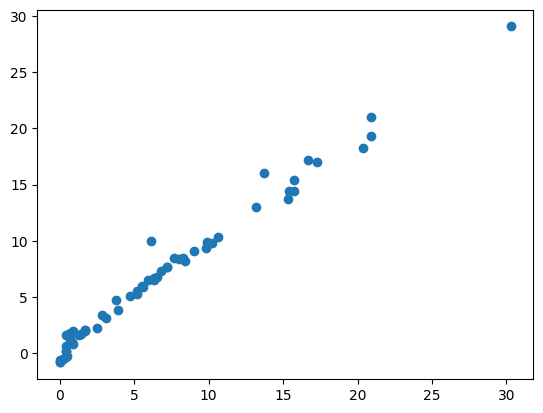

In [24]:
y_pred = lassocv.predict(X_test_scaled)
plt.scatter(y_test, y_pred)
# mean square error
mse = mean_squared_error(y_test, y_pred)
# mean absolute error
mae = mean_absolute_error(y_test, y_pred)
# R2 score
score = r2_score(y_test, y_pred)

print('MSE: ', mse)
print('MAE: ', mae)
print('r2_score: ', score)

### Ridge Regression (L2 regularization)

MSE:  0.6949198918152096
MAE:  0.5642305340105715
r2_score:  0.9842993364555512


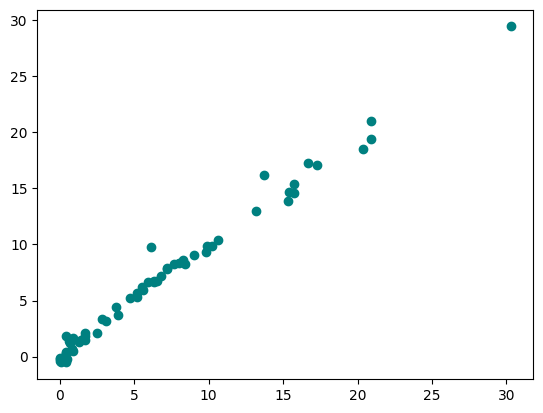

In [25]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X_train_scaled, y_train)
y_pred = ridge.predict(X_test_scaled)
# mean square error
mse = mean_squared_error(y_test, y_pred)
# mean absolute error
mae = mean_absolute_error(y_test, y_pred)
# R2 score
score = r2_score(y_test, y_pred)

print('MSE: ', mse)
print('MAE: ', mae)
print('r2_score: ', score)

plt.scatter(y_test, y_pred, color = 'teal')


#### Cross validation (L2 regularization)

MSE:  0.6949198918152096
MAE:  0.5642305340105715
r2_score:  0.9842993364555512


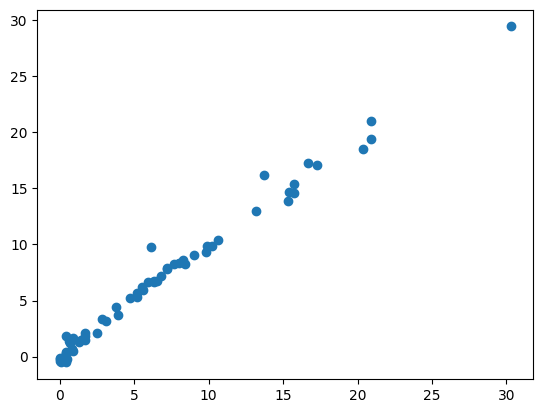

In [26]:
from sklearn.linear_model import RidgeCV

ridgecv= RidgeCV(cv =5)
ridgecv.fit(X_train_scaled, y_train)

y_pred = ridgecv.predict(X_test_scaled)
plt.scatter(y_test, y_pred)

# mean square error
mse = mean_squared_error(y_test, y_pred)
# mean absolute error
mae = mean_absolute_error(y_test, y_pred)
# R2 score
score = r2_score(y_test, y_pred)

print('MSE: ', mse)
print('MAE: ', mae)
print('r2_score: ', score)




In [27]:
ridgecv.alpha_

np.float64(1.0)

In [28]:
ridgecv.get_params

<bound method BaseEstimator.get_params of RidgeCV(cv=5)>

### ElasticNet

MSE:  5.5172511010252245
MAE:  1.8822353634896005
r2_score:  0.8753460589519703


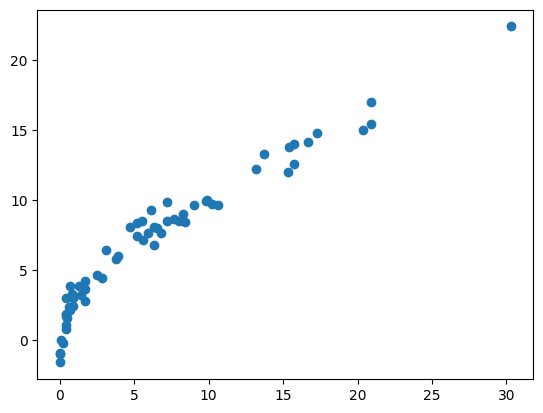

In [29]:
from sklearn.linear_model import ElasticNet

elasticnet = ElasticNet()
elasticnet.fit(X_train_scaled, y_train)
y_pred= elasticnet.predict(X_test_scaled)

# mean square error
mse = mean_squared_error(y_test, y_pred)
# mean absolute error
mae = mean_absolute_error(y_test, y_pred)
# R2 score
score = r2_score(y_test, y_pred)

print('MSE: ', mse)
print('MAE: ', mae)
print('r2_score: ', score)

plt.scatter(y_test, y_pred)

MSE:  0.8222830416276258
MAE:  0.6575946731430898
r2_score:  0.9814217587854941


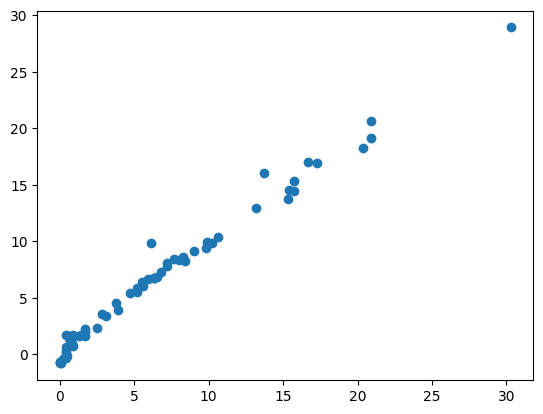

In [30]:
#### Cross validation with ElasticNet

from sklearn.linear_model import ElasticNetCV

elasticnetcv = ElasticNetCV(cv= 5)
elasticnetcv.fit(X_train_scaled, y_train)
y_pred= elasticnetcv.predict(X_test_scaled)

plt.scatter(y_test, y_pred)
# mean square error
mse = mean_squared_error(y_test, y_pred)
# mean absolute error
mae = mean_absolute_error(y_test, y_pred)
# R2 score
score = r2_score(y_test, y_pred)

print('MSE: ', mse)
print('MAE: ', mae)
print('r2_score: ', score)

## pickle the machine learning model, preprocessing model StandardScaler

In [35]:
scaler

,copy,True
,with_mean,True
,with_std,True


In [33]:
ridge

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [34]:
import pickle

pickle.dump(scaler, open('scaler.pkl', 'wb'))
pickle.dump(ridge, open('ridge.pkl', 'wb'))